**Data Set Palm Oil**
---
En el siguiente notebook de colab se encuentra la preparación del data set de cúltivos de palma de aceite para el desarollo de la tésis "Detección de monocultivos de palma de aceite en Colombia implementando un modelo de redes neuronales convolucionales a partir de imágenes stalitales"

In [ ]:
# Instalación de recursos
import glob 
from matplotlib import pyplot as plt
import cv2
from PIL import Image
from google.colab import drive
from pathlib import Path
import os

In [ ]:
#Conexión con Google Drive donde se encuentran las imagenes Base
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Función que recorta una imagen satelital que esta en formato tif en N cantidades de imagenes más pequeñas

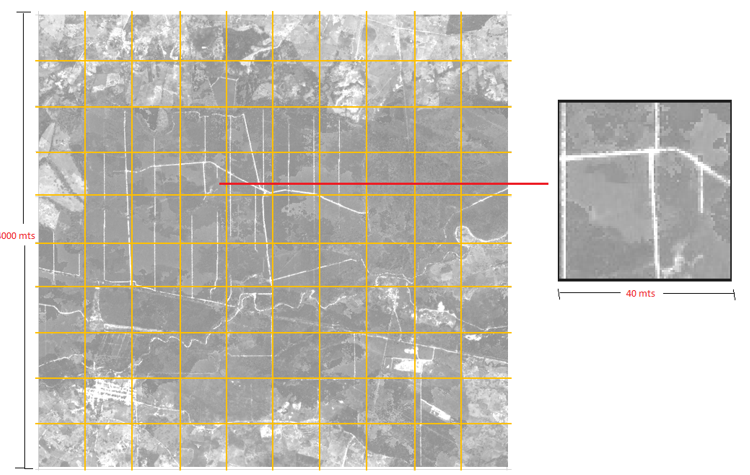

In [ ]:
def cropImage(path_image,count,path_destination):

  
  image = cv2.imread(path_image, cv2.IMREAD_UNCHANGED)
  
  width, height = image.shape[:2]
  filename=Path(path_image).name.replace('.tif','')
  print('Procesando imagen->'+filename)
  # Imprimir el ancho y la altura
  #print(f'Ancho: {width} px')
  #print(f'Altura: {height} px')

  # Tamaño de cada una de las 25 imágenes
  tile_width = width // count
  tile_height = height // count
  i = 1
  # Recorrer la imagen y extraer los bloques de píxeles para cada imagen resultante
          
  for row in range(count):
      for col in range(count):
          # Calcular la región de interés (ROI) para la imagen actual
          left = col * tile_width
          upper = row * tile_height
          right = left + tile_width
          lower = upper + tile_height
                    
          # Extraer el bloque de píxeles de la imagen original
          tile = image[upper:lower, left:right]
          
          # Guardar la imagen resultante con un nombre de archivo único
          newFilename = f'{filename}_{i}.jpg'
          cv2.imwrite(path_destination + newFilename, tile)
          i=i+1
          #print(str(i)+'_Nueva imagen->'+newFilename)

Obtenemos la lista de imagenes satelitales tif

In [ ]:
path = r'/content/drive/MyDrive/TESIS/DataSet/Satelital_Images_NOTPalmOil/*.tif'
#path = r'/content/drive/MyDrive/TESIS/DataSet/Satelital_Images/Test_VV_VH/*VV_VH.tif'
files = glob.glob(path)
print('Total files='+ str(len(files)))
#files

Total files=46


In [ ]:
pathDestination='/content/drive/MyDrive/GEE_Export/DataSetFinalCropNOTPalm_Oil/'
i=1
for file in files:
  cropImage(file,10,pathDestination)
  print(str(i)+' Terminé imagen->'+file)
  i=i+1

Procesando imagen->SiPuedes_Magdalena_Sentinel-1_composite_VV_VH
1 Terminé imagen->/content/drive/MyDrive/TESIS/DataSet/Satelital_Images_NOTPalmOil/SiPuedes_Magdalena_Sentinel-1_composite_VV_VH.tif
Procesando imagen->SiPuedes_Magdalena_Sentinel-2_composite_B4
2 Terminé imagen->/content/drive/MyDrive/TESIS/DataSet/Satelital_Images_NOTPalmOil/SiPuedes_Magdalena_Sentinel-2_composite_B4.tif
Procesando imagen->LaUnion_Magdalena_Sentinel-2_composite_B4
3 Terminé imagen->/content/drive/MyDrive/TESIS/DataSet/Satelital_Images_NOTPalmOil/LaUnion_Magdalena_Sentinel-2_composite_B4.tif
Procesando imagen->LaUnion_Magdalena_Sentinel-1_composite_VV_VH
4 Terminé imagen->/content/drive/MyDrive/TESIS/DataSet/Satelital_Images_NOTPalmOil/LaUnion_Magdalena_Sentinel-1_composite_VV_VH.tif
Procesando imagen->PuebloBarrios_Magdalena_Sentinel-2_composite_B4
5 Terminé imagen->/content/drive/MyDrive/TESIS/DataSet/Satelital_Images_NOTPalmOil/PuebloBarrios_Magdalena_Sentinel-2_composite_B4.tif
Procesando imagen->Pue

Se crea la siguiente function para mover unas imagenes dañadas y realizar una limpieza de la data.

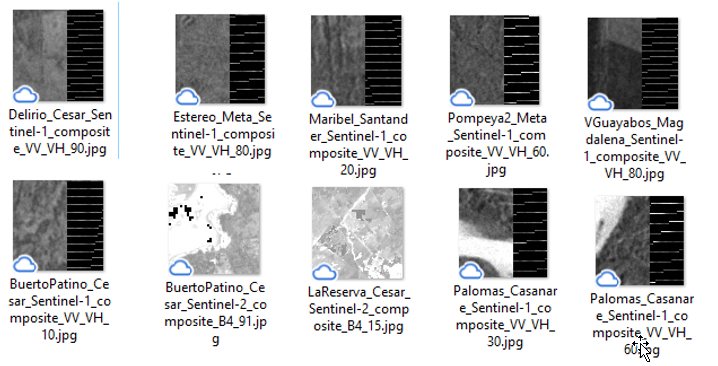

In [ ]:
import os
import shutil

def filter_and_move_images(src_path, dst_path, keywords):
    print('Source Origen->'+src_path)
    print('Source Destination->'+dst_path)

    # Crear el directorio de destino si no existe
    os.makedirs(dst_path, exist_ok=True)

    # Listar todos los archivos en la ruta de origen
    files = os.listdir(src_path)
    print('Cantidad de archivos ->'+ str(files.count))

    # Iterar a través de cada archivo en la ruta de origen
    for file in files:
        #print('File ->'+ str(file.lower()))
        # Verificar si el archivo es una imagen y contiene alguna de las palabras clave
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff', '.bmp')) and any(keyword in file.lower() for keyword in keywords):
            print('Entra al If->'+file)
            # Mover el archivo a la ruta de destino
            shutil.move(os.path.join(src_path, file), os.path.join(dst_path, file))
            print('Moviendo Imagen->'+file)

Se implementa la function anterior. 

In [ ]:
# Rutas de origen y destino
src_path = '/content/drive/MyDrive/GEE_Export/DataSetFinalCrop/'
dst_path = '/content/drive/MyDrive/GEE_Export/Limpieza_Data'

# Palabras clave para filtrar imágenes
keywords = ['vv_vh_10', 'vv_vh_20', 'vv_vh_30', 'vv_vh_40', 'vv_vh_50', 'vv_vh_60', 'vv_vh_70', 'vv_vh_80', 'vv_vh_90', 'vv_vh_100']

# Llamar a la función
filter_and_move_images(src_path, dst_path, keywords)

Source Origen->/content/drive/MyDrive/GEE_Export/DataSetFinalCrop/
Source Destination->/content/drive/MyDrive/GEE_Export/Limpieza_Data
Cantidad de archivos -><built-in method count of list object at 0x7fc6f3e7f380>


Se realiza otra función para mover algunas imagenes que no contienen especificamente los monocultivos

In [ ]:
def filter_and_move_images_2(src_path, dst_path, prefix, keywords):
    # Crear el directorio de destino si no existe
    os.makedirs(dst_path, exist_ok=True)

    # Listar todos los archivos en la ruta de origen
    files = os.listdir(src_path)

    # Iterar a través de cada archivo en la ruta de origen
    for file in files:
       # print(f"File: {file}")

        is_image = file.lower().endswith('.jpg')
        has_prefix = file.lower().startswith(prefix.lower())
        has_keyword = any(keyword in file.lower() for keyword in keywords)

        #print(f"Is image: {is_image}")
        #print(f"Has prefix: {has_prefix}")
        #print(f"Has keyword: {has_keyword}")
        # Verificar si el archivo es una imagen, empieza con el prefijo especificado y contiene alguna de las palabras clave
        if is_image and has_prefix and has_keyword:
            # Mover el archivo a la ruta de destino
            shutil.move(os.path.join(src_path, file), os.path.join(dst_path, file))
            print('Moviendo Imagen->'+file)


In [ ]:
# Rutas de origen y destino
src_path = '/content/drive/MyDrive/GEE_Export/DataSetFinalCrop/'
dst_path = '/content/drive/MyDrive/GEE_Export/Limpieza_Data/Others/LCalmaMagdalena'

# Prefijo y palabras clave para filtrar imágenes
prefix = 'LCalma_Magdalena_Sentinel-1'
# Palabras clave para filtrar imágenes
keywords = ['vv_vh_3.',
'vv_vh_1.',
'vv_vh_2.',
'vv_vh_14.',
'vv_vh_11.',
'vv_vh_12.',
'vv_vh_13.',
'vv_vh_17.',
'vv_vh_22.',
'vv_vh_21.',
'vv_vh_28.',
'vv_vh_25.',
'vv_vh_26.',
'vv_vh_27.',
'vv_vh_24.',
'vv_vh_34.',
'vv_vh_31.',
'vv_vh_32.',
'vv_vh_33.',
'vv_vh_38.',
'vv_vh_44.',
'vv_vh_41.',
'vv_vh_42.',
'vv_vh_43.',
'vv_vh_54.',
'vv_vh_53.',
'vv_vh_63.',
'vv_vh_60.',
'vv_vh_61.',
'vv_vh_62.',
'vv_vh_81.',
'vv_vh_94.',
'vv_vh_90.',
'vv_vh_91.',
'vv_vh_92.',
'vv_vh_93.',
'vv_vh_99.',
'vv_vh_100.',
'vv_vh_98.',




]

# Llamar a la función
filter_and_move_images_2(src_path, dst_path, prefix, keywords)

Moviendo Imagen->LCalma_Magdalena_Sentinel-1_composite_VV_VH_1.jpg
Moviendo Imagen->LCalma_Magdalena_Sentinel-1_composite_VV_VH_2.jpg
Moviendo Imagen->LCalma_Magdalena_Sentinel-1_composite_VV_VH_3.jpg
Moviendo Imagen->LCalma_Magdalena_Sentinel-1_composite_VV_VH_12.jpg
Moviendo Imagen->LCalma_Magdalena_Sentinel-1_composite_VV_VH_11.jpg
Moviendo Imagen->LCalma_Magdalena_Sentinel-1_composite_VV_VH_13.jpg
Moviendo Imagen->LCalma_Magdalena_Sentinel-1_composite_VV_VH_14.jpg
Moviendo Imagen->LCalma_Magdalena_Sentinel-1_composite_VV_VH_17.jpg
Moviendo Imagen->LCalma_Magdalena_Sentinel-1_composite_VV_VH_21.jpg
Moviendo Imagen->LCalma_Magdalena_Sentinel-1_composite_VV_VH_22.jpg
Moviendo Imagen->LCalma_Magdalena_Sentinel-1_composite_VV_VH_93.jpg
Moviendo Imagen->LCalma_Magdalena_Sentinel-1_composite_VV_VH_92.jpg
Moviendo Imagen->LCalma_Magdalena_Sentinel-1_composite_VV_VH_24.jpg
Moviendo Imagen->LCalma_Magdalena_Sentinel-1_composite_VV_VH_26.jpg
Moviendo Imagen->LCalma_Magdalena_Sentinel-1_compos

A continuación se realiza una function que tiene el objetivo de recorrer todas las imágenes de monocultivos de palma de aceite y generar nuevas imagenes , realizando rotación de las mismas , y otros algoritmos.

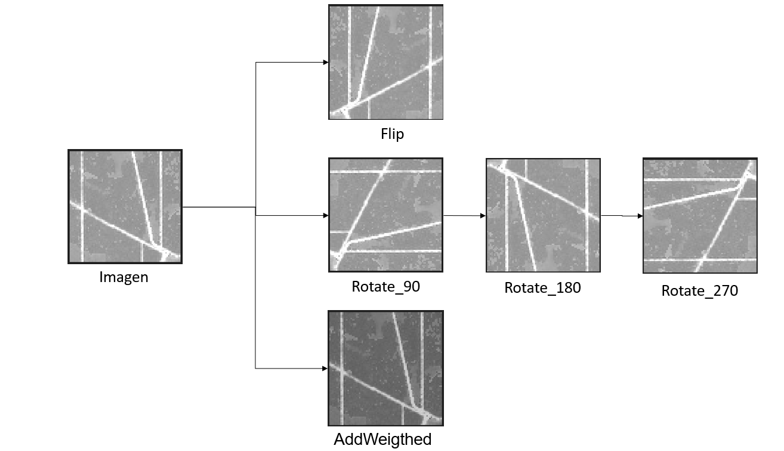

In [ ]:
def process_and_save_images(src_path, dst_path, start_index, end_index):
    # Crear el directorio de destino si no existe
    os.makedirs(dst_path, exist_ok=True)

    # Listar todos los archivos en la ruta de origen
    files = os.listdir(src_path)
    files = [file for file in files if file.lower().endswith('.jpg')]
    files = files[start_index:end_index]

    # Iterar a través de cada archivo en la ruta de origen
    for file in files:
        # Leer la imagen
        img = cv2.imread(os.path.join(src_path, file))

        # Realizar operaciones de procesamiento de imágenes
        flipped = cv2.flip(img, 1)  # Flipping horizontal
            
        rotated_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)  # Rotación de 90 grados en sentido horario
        rotated_180 = cv2.rotate(img, cv2.ROTATE_180)  # Rotación de 180 grados
        rotated_270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)  # Rotación de 270 grados en sentido horario

        # Ajuste de brillo
        alpha = 1.0  # Coeficiente de contraste
        beta = -50  # Coeficiente de brillo (valor negativo para oscurecer la imagen)
        darker = cv2.addWeighted(img, alpha, img, 0, beta)

        # Guardar imágenes procesadas en el directorio de destino
        base_name, ext = os.path.splitext(file)
        cv2.imwrite(os.path.join(dst_path, f"{base_name}_flip{ext}"), flipped)
        cv2.imwrite(os.path.join(dst_path, f"{base_name}_rot_90{ext}"), rotated_90)
        cv2.imwrite(os.path.join(dst_path, f"{base_name}_rot_180{ext}"), rotated_180)
        cv2.imwrite(os.path.join(dst_path, f"{base_name}_rot_270{ext}"), rotated_270)
        cv2.imwrite(os.path.join(dst_path, f"{base_name}_dark{ext}"), darker)


Implementación de la function

In [ ]:
# Rutas de origen y destino
#src_path = '/content/drive/MyDrive/GEE_Export/DataSetFinalCrop'
#dst_path = '/content/drive/MyDrive/GEE_Export/GenerationDataFinal'
src_path = '/content/drive/MyDrive/GEE_Export/DataSetFinalCropNOTPalm_Oil'
dst_path = '/content/drive/MyDrive/GEE_Export/GenerationDataFinal_NOTPalmOil'

# Indices de inicio y fin
start_index = 2030
end_index = 2080

# Llamar a la función
process_and_save_images(src_path, dst_path, start_index, end_index)

A continuación se encuentra el codigo para modificar el nombre de cada imagen que no pertenece al los cultivos de palma de aciete y le agregue el prefijo al inicio de NPO_ que representa NotPalmOil


In [ ]:
def add_npo_prefix(folder_path):
    # Lista todos los archivos en la carpeta especificada
    files = os.listdir(folder_path)

    # Itera sobre cada archivo en la carpeta
    for file in files:
        # Verifica si el archivo ya tiene el prefijo 'NPO_'
        if not file.startswith("NPO_"):
            # Combina la ruta de la carpeta, el prefijo 'NPO_' y el nombre original del archivo
            new_name = os.path.join(folder_path, "NPO_" + file)
            original_path = os.path.join(folder_path, file)

            # Renombra el archivo
            os.rename(original_path, new_name)
            print(f"Archivo renombrado: {original_path} -> {new_name}")

In [ ]:
# Reemplaza 'your_folder_path' con la ruta de la carpeta que contiene las imágenes
folder_path = "/content/drive/MyDrive/GEE_Export/DataSetFinalCropNOTPalm_Oil"
add_npo_prefix(folder_path)

En el siguiente codigo se prepara la información de tanto de entrenamiento como de test para las CNN. La información se encuentra de la siguiente forma:


In [ ]:
import os
import shutil
import random


def delete_files_in_directory(directory):
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        if os.path.isfile(file_path):
            os.unlink(file_path)

def split_images_into_train_test(source, test_path, train_path, test_count):
    # List all files in the specified folder
    images = os.listdir(source)

    # Select random images for the test set
    test_images = random.sample(images, test_count)

    # Copy the selected images to the test set
    for image in test_images:
        shutil.copy(os.path.join(source, image), os.path.join(test_path, image))

    # Copy the remaining images to the train set
    for image in images:
        if image not in test_images:
            shutil.copy(os.path.join(source, image), os.path.join(train_path, image))


In [ ]:
# Iteration I : DataSetFinalCropPalmOil
# Source folder path
source = "/content/drive/MyDrive/GEE_Export/DataSetFinalCropPalmOil"

# Destination folder paths
test_path = "/content/drive/MyDrive/TESIS/DataSet/Iteration_I/Test_PalmOil"
train_path = "/content/drive/MyDrive/TESIS/DataSet/Iteration_I/Train_PalmOil"

# Number of images for the test set
test_count = 671

# Delete current content in test and train folders
delete_files_in_directory(test_path)
delete_files_in_directory(train_path)

# Run the function
split_images_into_train_test(source, test_path, train_path, test_count)

In [ ]:
# Iteration I : GenerationDataFinal_PalmOil
# Source folder path
source = "/content/drive/MyDrive/GEE_Export/GenerationDataFinal_PalmOil"

# Destination folder paths
test_path = "/content/drive/MyDrive/TESIS/DataSet/Iteration_I/Test_PalmOil"
train_path = "/content/drive/MyDrive/TESIS/DataSet/Iteration_I/Train_PalmOil"

# Number of images for the test set
test_count = 3377

# Run the function
split_images_into_train_test(source, test_path, train_path, test_count)

In [ ]:
# Iteration I : DataSetFinalCropNOTPalm_Oil
# Source folder path
source = "/content/drive/MyDrive/GEE_Export/DataSetFinalCropNOTPalm_Oil"

# Destination folder paths
test_path = "/content/drive/MyDrive/TESIS/DataSet/Iteration_I/Test_NOTPalmOil"
train_path = "/content/drive/MyDrive/TESIS/DataSet/Iteration_I/Train_NOTPalmOil"

# Number of images for the test set
test_count = 1298


# Delete current content in test and train folders
delete_files_in_directory(test_path)
delete_files_in_directory(train_path)

# Run the function
split_images_into_train_test(source, test_path, train_path, test_count)

In [ ]:
# Iteration I : GenerationDataFinal_NOTPalmOil
# Source folder path
source = "/content/drive/MyDrive/GEE_Export/GenerationDataFinal_NOTPalmOil"

# Destination folder paths
test_path = "/content/drive/MyDrive/TESIS/DataSet/Iteration_I/Test_NOTPalmOil"
train_path = "/content/drive/MyDrive/TESIS/DataSet/Iteration_I/Train_NOTPalmOil"

# Number of images for the test set
test_count = 2750

# Run the function
split_images_into_train_test(source, test_path, train_path, test_count)